# Cu LMM XPS Analysis

In [1]:
# Libraries
import numpy as np
import pandas as pd
import os
from scipy.interpolate import interp1d
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
# Function to interpolate
def interpolate(x, y):
    f = interp1d(x, y, kind='cubic', fill_value="extrapolate")
    xnew = np.arange(565, 580, 0.25)
    return xnew, f(xnew)

def normalize(y):
    return ((y) - min(y))/(max(y)-min(y))

In [3]:
df = pd.DataFrame()
drctry = './CuOx/Cu_LMM/'
files = os.listdir(drctry)
for file in files:
    if 'Cu' in file:
        data = pd.read_table(os.path.join(drctry, file))
        data = data[::-1]
        data = data.drop_duplicates(subset='x', keep="last")
        x = np.asarray(data.x)
        y = np.asarray(data.y)
        xnew, fnew = interpolate(x, y)
        df['xnew'] = xnew
        df[file] = normalize(fnew)
        

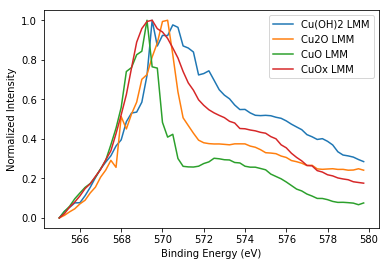

In [4]:
df.plot(x="xnew", y=['Cu(OH)2 LMM', 'Cu2O LMM',
                    'CuO LMM', 'CuOx LMM'])
plt.xlabel('Binding Energy (eV)')
plt.ylabel('Normalized Intensity')
plt.savefig('')

In [5]:
X = np.array([np.asarray(df['Cu(OH)2 LMM']), 
              np.asarray(df['Cu2O LMM']), 
              np.asarray(df['CuO LMM'])])
Y = np.ndarray.flatten(np.asarray(df['CuOx LMM']))

In [6]:
(np.linalg.lstsq(np.transpose(X), Y))

(array([ 0.40926855,  0.29445826,  0.49194446]),
 array([ 0.10195407]),
 3,
 array([ 5.92133877,  1.29828057,  0.54348022]))

In [7]:
linY = 0.41 * np.asarray(df['Cu(OH)2 LMM']) + 0.29 * np.asarray(df['Cu2O LMM']) + 0.49 * np.asarray(df['CuO LMM'])
df['linY'] = linY

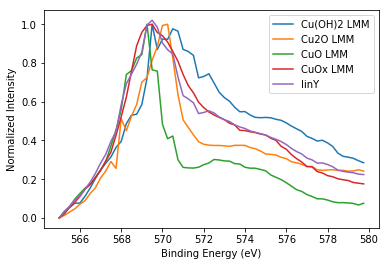

In [8]:
df.plot(x="xnew", y=['Cu(OH)2 LMM', 'Cu2O LMM',
                    'CuO LMM', 'CuOx LMM','linY'])
plt.xlabel('Binding Energy (eV)')
plt.ylabel('Normalized Intensity')
plt.savefig('')

In [9]:
area_total = np.trapz(linY)
area_cuoh = np.trapz(0.41 * np.asarray(df['Cu(OH)2 LMM']))
area_cu2o = np.trapz(0.29 * np.asarray(df['Cu2O LMM']))
area_cuo = np.trapz(0.49 * np.asarray(df['CuO LMM']))

In [10]:
area_cuoh/area_total*100

45.210969040210308

In [11]:
area_cu2o/area_total*100

23.625677293446632

In [12]:
area_cuo/area_total*100

31.163353666343056

In [61]:
45+24+31

100

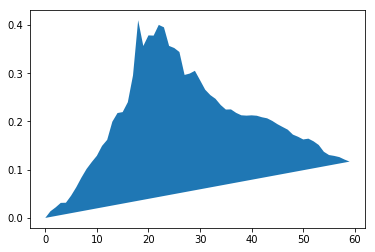

In [31]:
plt.fill(0.41 * np.asarray(df['Cu(OH)2 LMM']))
#plt.fill(0.29 * np.asarray(df['Cu2O LMM']))
#plt.fill(0.49 * np.asarray(df['CuO LMM']))
#plt.fill(linY)

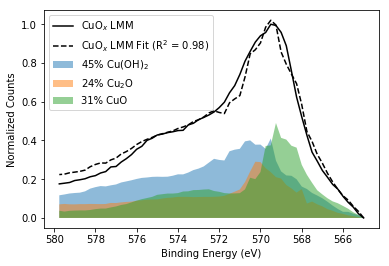

In [75]:
import numpy as np
import matplotlib.pyplot as plt

y_0 = np.asarray(df['CuOx LMM'])
y = 0.41 * np.asarray(df['Cu(OH)2 LMM'])
yy = 0.29 * np.asarray(df['Cu2O LMM'])
yyy = 0.49 * np.asarray(df['CuO LMM'])
x = np.asarray(df['xnew'])

fig, (ax1) = plt.subplots(1,1); 
ax1.fill_between(x, 0, y, alpha=0.5)
ax1.fill_between(x, 0, yy, alpha=0.5)
ax1.fill_between(x, 0, yyy, alpha=0.5)
ax1.invert_xaxis()
plt.plot(x, y_0, color='black')
plt.plot(x, linY, color='black', linestyle='dashed')
plt.ylabel('Normalized Counts')
plt.xlabel('Binding Energy (eV)')
ax1.legend(['CuO$_x$ LMM', 'CuO$_x$ LMM Fit (R$^2$ = 0.98)', 
            '45% Cu(OH)$_2$', '24% Cu$_2$O', '31% CuO'])
plt.savefig('Cu_LMM_Fits', dpi=300)
plt.show()


In [64]:
from sklearn.metrics import r2_score
r2_score(y_0, linY)

0.97610279950698853